<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/STPY_38_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Задание 1

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.groupby('Genre').sum()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Genre,,,,,,,,,
Action,6642630.0,879.01,519.13,161.44,184.60,1745.27,125929.0,52506.0,345668.0
Adventure,2596685.0,105.26,63.54,52.30,16.49,237.69,21102.0,7143.0,31023.0
Fighting,1677895.0,223.36,100.33,87.48,36.36,447.48,28310.0,11415.0,25907.0
Misc,3454612.0,407.27,212.74,108.11,74.39,803.18,34842.0,11262.0,13659.0
Platform,1759387.0,445.50,200.35,130.83,51.09,828.08,33825.0,11778.0,46707.0
Puzzle,1140976.0,122.87,50.01,57.31,12.38,243.02,15103.0,4549.0,4160.0
Racing,2457964.0,359.35,236.51,56.71,76.10,728.90,50429.0,17087.0,44468.0
Role-Playing,2976575.0,330.81,188.71,355.46,59.63,934.40,53545.0,23945.0,238315.0
Shooter,2599819.0,592.24,317.34,38.76,104.11,1052.94,66251.0,33616.0,346110.0


In [ ]:
#Избавимся от пропусков в данных
df1 = df.dropna(subset=['Critic_Score'])

**1. Как критики относятся к спортивным играм?**

In [ ]:
#Рассчитаем среднее значение оценки критиков для всех жанров
mean_total = df1['Critic_Score'].mean()
print(f"Средняя оценка критиков для всех жанров {mean_total:.2f}")

Средняя оценка критиков для всех жанров 68.97


In [ ]:
#Рассчитаем среднее значение оценки критиков для жанра "Sport"
mean_sport = df1[df1['Genre'] == 'Sports']['Critic_Score'].mean()
print(f"Средняя оценка критиков для жанра 'Sport' {mean_sport:.2f}")

Средняя оценка критиков для жанра 'Sport' 71.97


Сформулируем гипотезы:

H0 - жанр Sport по мнению критиков в среднем низкого качества

H1 - жанр Sport по мнению критиков в среднем хорошего качества

In [ ]:
import numpy as np
import scipy.stats as st

In [ ]:
ci_lower, ci_upper = st.norm.interval(alpha=0.95, loc=np.mean(df1[df1['Genre'] == 'Sports']['Critic_Score']), scale=st.sem(df1[df1['Genre'] == 'Sports']['Critic_Score']))
print(f'Мы уверены на 95%, что средняя оценка жанра "Sport" находится в диапазоне между {ci_lower:5.2f} и {ci_upper:5.2f}')

Мы уверены на 95%, что средняя оценка жанра "Sport" находится в диапазоне между 71.18 и 72.76


С 95% вероятностью мы уверены, что жанр "Sport" имеет среднюю оценку выше общее средней оценки по всем жанрам, значит отклоняем 0 гипотезу

**2. Критикам нравятся больше игры на PC или на PS4?**

In [ ]:
#Рассчитаем среднее значение оценки критиков для платформ "PC" и "PS4"
mean_pc = df1[df1['Platform'] == 'PC']['Critic_Score'].mean()
print(f"Средняя оценка 'PC' {mean_pc:.2f}")
mean_ps4 = df1[df1['Platform'] == 'PS4']['Critic_Score'].mean()
print(f"Средняя оценка 'PS4' {mean_ps4:.2f}")

Средняя оценка 'PC' 75.93
Средняя оценка 'PS4' 72.09


В среднем оценка PC выше, чем на PS4, но является ли эта разница статистически значимой?

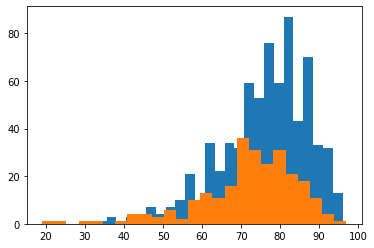

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df1[df1['Platform'] == 'PC']['Critic_Score'], bins=25); #PC
plt.hist(df1[df1['Platform'] == 'PS4']['Critic_Score'], bins=25);  #PS4

In [ ]:
#Мы видим, что в обоих случая распределение не нормальное,
#значит мы не можем использать T-test
#по этой причине используем тест Манна-Уитни
stat, p = st.mannwhitneyu(df1[df1['Platform'] == 'PC']['Critic_Score'],
                          df1[df1['Platform'] == 'PS4']['Critic_Score'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 106906.50000, p = 0.00001
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


Действительно, можем сделать вывод, что критика больше нравятся игры на платформе "PC"

**3. Критикам больше нравятся стрелялки или стратегии?**

In [ ]:
#Рассчитаем среднее значение оценки критиков для жанров "Shooter" и "Strategy"
mean_shooter = df1[df1['Genre'] == 'Shooter']['Critic_Score'].mean()
print(f"Средняя оценка 'Shooter' {mean_shooter:.2f}")
mean_strategy = df1[df1['Genre'] == 'Strategy']['Critic_Score'].mean()
print(f"Средняя оценка 'Strategy' {mean_strategy:.2f}")

Средняя оценка 'Shooter' 70.18
Средняя оценка 'Strategy' 72.09


В среднем оценка "Shooter" выше, чем на "Strategy", но является ли эта разница статистически значимой?

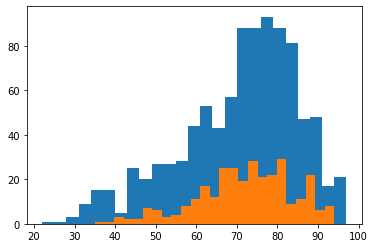

In [ ]:
plt.hist(df1[df1['Genre'] == 'Shooter']['Critic_Score'], bins=25); #Shooter
plt.hist(df1[df1['Genre'] == 'Strategy']['Critic_Score'], bins=25);  #Strategy

<Figure size 1080x720 with 0 Axes>

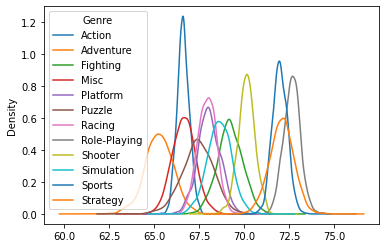

In [ ]:
#нормализуем данные
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = df1.sample(frac=1, replace=True).groupby(
        'Genre')['Critic_Score'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-st.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
stat, p = f_test(boot_1d['Shooter'], boot_1d['Strategy'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=0.489, p=1.00000
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [ ]:
stat, p = st.ttest_ind(boot_1d['Shooter'], boot_1d['Strategy'])
print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-75.874, p=0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


С 95% вероятностью критикам больше нравятся стратегии

# Задание 2

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
df2

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df2['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def words_def(row):
  texts_lower_case = row['Message'].lower()
  only_words_text = re.sub('[\W_]+',' ', texts_lower_case)
  texts_splitted = only_words_text.split()
  Text_without_trash = ''
  for word in texts_splitted:
    if word not in stopwords_set:
      Text_without_trash += ' ' + wordnet_lemmatizer.lemmatize(word)
  return(Text_without_trash.strip())

In [ ]:
df2['Text_without_trash'] = df2.apply(words_def, axis=1)
df2

,Category,Message,Text_without_trash
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [ ]:
print(df2['Message'][4])
print(df2['Text_without_trash'][4])

Nah I don't think he goes to usf, he lives around here though
nah think go usf life around though


In [ ]:
df2.loc[df2['Category'] == 'ham', 'Category_num'] = 0
df2.loc[df2['Category'] == 'spam', 'Category_num'] = 1
df2

,Category,Message,Text_without_trash,Category_num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0.0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1.0
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,0.0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...,1.0
5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home,0.0
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion,0.0
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,0.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df2.Text_without_trash)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_class = df2['Category_num'].to_numpy()
df_class

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df2['Category'], test_size=0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [ ]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: Category, Length: 1672, dtype: object

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(X_test))

array([[1445,    3],
       [  66,  158]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(X_test))

0.958732057416268

In [ ]:
len(lr.predict(X_test))

1672

In [ ]:
len(y_test)

1672

In [ ]:
df3 = pd.DataFrame(X_test)
df3['Predict'] = lr.predict(X_test)
df3['Fact'] = y_test
df3.drop(df3.columns.difference(['Fact','Predict']), 1, inplace=True)
df3

<ipython-input-142-a8bb5919e646>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df3.drop(df3.columns.difference(['Fact','Predict']), 1, inplace=True)


,Predict,Fact
3245,ham,ham
944,ham,ham
1044,ham,ham
2484,ham,ham
812,ham,ham
...,...,...
2505,ham,ham
2525,spam,spam
4975,ham,ham
650,spam,spam


In [ ]:
df3['Status'] = df3['Fact'] == df3['Predict']
df_4 = df3[df3['Status'] == False]
df_4

,Predict,Fact,Status
2952,spam,ham,False
881,ham,spam,False
1961,ham,spam,False
3864,ham,spam,False
2575,ham,spam,False
...,...,...,...
4543,ham,spam,False
752,ham,spam,False
309,ham,spam,False
495,spam,ham,False


In [ ]:
df_prefinal = df_4.merge(df2, left_index = True, right_index = True)
df_prefinal

,Predict,Fact,Status,Category,Message,Text_without_trash,Category_num
2952,spam,ham,False,ham,Hey now am free you can call me.,hey free call,0.0
881,ham,spam,False,spam,Reminder: You have not downloaded the content ...,reminder downloaded content already paid goto ...,1.0
1961,ham,spam,False,spam,Guess what! Somebody you know secretly fancies...,guess somebody know secretly fancy wanna find ...,1.0
3864,ham,spam,False,spam,Oh my god! I've found your number again! I'm s...,oh god found number glad text back xafter msg ...,1.0
2575,ham,spam,False,spam,Your next amazing xxx PICSFREE1 video will be ...,next amazing xxx picsfree1 video sent enjoy on...,1.0
...,...,...,...,...,...,...,...
4543,ham,spam,False,spam,FreeMsg Hi baby wow just got a new cam moby. W...,freemsg hi baby wow got new cam moby wanna c h...,1.0
752,ham,spam,False,spam,You have an important customer service announc...,important customer service announcement premier,1.0
309,ham,spam,False,spam,TheMob> Check out our newest selection of cont...,themob check newest selection content game ton...,1.0
495,spam,ham,False,ham,Are you free now?can i call now?,free call,0.0


In [ ]:
df_final = df_prefinal.drop(df_prefinal.columns.difference(['Fact','Predict', 'Status', 'Message']), 1)
df_final

<ipython-input-145-eac529065769>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_final = df_prefinal.drop(df_prefinal.columns.difference(['Fact','Predict', 'Status', 'Message']), 1)


,Predict,Fact,Status,Message
2952,spam,ham,False,Hey now am free you can call me.
881,ham,spam,False,Reminder: You have not downloaded the content ...
1961,ham,spam,False,Guess what! Somebody you know secretly fancies...
3864,ham,spam,False,Oh my god! I've found your number again! I'm s...
2575,ham,spam,False,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...,...
4543,ham,spam,False,FreeMsg Hi baby wow just got a new cam moby. W...
752,ham,spam,False,You have an important customer service announc...
309,ham,spam,False,TheMob> Check out our newest selection of cont...
495,spam,ham,False,Are you free now?can i call now?


In [ ]:
df2.iloc[4543]

Category                                                           spam
Message               FreeMsg Hi baby wow just got a new cam moby. W...
Text_without_trash    freemsg hi baby wow got new cam moby wanna c h...
Category_num                                                        1.0
Name: 4543, dtype: object